In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylcp
from scipy.stats import iqr
from pylcp.common import progressBar

In [2]:
mass = 200

# Make a method to return the lasers:
def return_lasers(delta, s):
    return pylcp.laserBeams([
        {'kvec':np.array([1., 0., 0.]), 'pol':np.array([0., 1., 0.]),
         'pol_coord':'spherical', 'delta':delta, 's':s},
        {'kvec':np.array([-1., 0., 0.]), 'pol':np.array([0., 1., 0.]),
         'pol_coord':'spherical', 'delta':delta, 's':s},
        ], beam_type=pylcp.infinitePlaneWaveBeam)

# Now define a two level Hamiltonian, connected using pi-light.
def return_hamiltonian(delta):
    Hg = np.array([[0.]])
    He = np.array([[-delta]])
    mu_q = np.zeros((3, 1, 1))
    d_q = np.zeros((3, 1, 1))
    d_q[1, 0, 0] = 1.

    return pylcp.hamiltonian(Hg, He, mu_q, mu_q, d_q, mass=mass)

hamiltonian = return_hamiltonian(0.)

magField = lambda R: np.zeros(R.shape)

Completed in 17.44 s.


NameError: name 'x_fit' is not defined

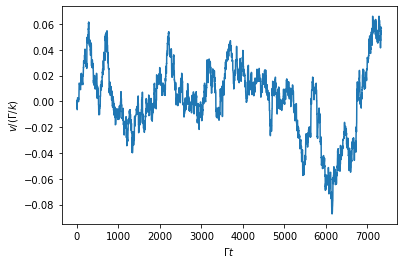

In [6]:
s = 3
delta = -1

laserBeams = return_lasers(delta, s)
hamiltonian = return_hamiltonian(0.)

#eqn = pylcp.heuristiceq(laserBeams, magField, mass=mass)
eqn = pylcp.rateeq(laserBeams, magField, hamiltonian, include_mag_forces=False)
#eqn = pylcp.obe(laserBeams, magField, hamiltonian)

#N_atom = 256
N_atom = 1
v_final = np.zeros((N_atom,))
#num_of_scatters = np.zeros((N_atom,), dtype='int')
#num_of_steps = np.zeros((N_atom,), dtype='int')

fig, ax = plt.subplots(1, 1)
sols = []
progress = progressBar()
for ii in range(N_atom):
    eqn.set_initial_position_and_velocity(np.array([0., 0., 0.]), np.array([0., 0., 0.]))
    if isinstance(eqn, pylcp.rateeq):
        eqn.set_initial_pop_from_equilibrium()
    elif isinstance(eqn, pylcp.obe):
        eqn.set_initial_rho_from_rateeq()

    eqn.evolve_motion([0., 10*mass*(1+2*s+4*np.abs(delta)**2)/s],
                      random_recoil=True,
                      max_scatter_probability=0.25,
                      freeze_axis=[False, False, False])
    progress.update((ii+1.)/N_atom)

    if ii<10:
        ax.plot(eqn.sol.t, eqn.sol.v[0])

    v_final[ii] = eqn.sol.v[0, -1]

    sols.append(eqn.sol)
    #num_of_scatters[ii] = sum(eqn.sol.n_random)
    #num_of_steps[ii] = len(eqn.sol.t)

ax.set_xlabel('$\Gamma t$')
ax.set_ylabel('$v/(\Gamma/k)$');

eqn.generate_force_profile(np.zeros((3,) + x_fit.shape),
                           [x_fit, np.zeros(x_fit.shape), np.zeros(x_fit.shape)],
                            name='molasses')